allegence 

In [26]:
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [28]:
import sys
sys.path.append("..")
import os

%matplotlib inline

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from fctools import networks, figures

#---- matplotlib settings
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'

import scipy.io as scio
import os

In [13]:
out_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'
parcellation = 'network32'
f'{out_dir}\\{parcellation}\\allegiance_matrix_network32_opt_mean_corrected_50.npy'
allegiance_matrix = np.load(f'{out_dir}\\{parcellation}\\allegiance_matrix_network32_opt_mean_corrected_50.npy')

In [14]:
print(allegiance_matrix.shape)

roi_label =[]
node_path = r'H:\Matlab\Software\conn\rois\networks.txt'
with open(node_path,"r") as file:
    for num,line in enumerate(file.readlines()):
#         a = line.split(' ')[0].split('\t')[-1].strip('\n')
    
        a = line.split(' ')[0]
        b = line.split(' ')[1]
        if b == "(L)" or b =="(R)":
#             print(a+b)
            roi_label.append(a+b)
        else:
            roi_label.append(a)
    file.close()
roi_lab_inx = np.array([1]*4+[2]*3+[3]*4+[4]*7+[5]*4+[6]*4+[7]*4+[8]*2)
roi_networks = np.array(['DMN','DMN','DMN','DMN','SMN','SMN','SMN','VIS','VIS','VIS','VIS',"SAN","SAN","SAN","SAN","SAN","SAN","SAN","DAN","DAN","DAN"
          ,"DAN","FPN","FPN","FPN","FPN","LN","LN","LN","LN","CE","CE"])
roi_lab_df = pd.DataFrame({0:roi_lab_inx,1:roi_networks})

(30, 32, 32)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1080x1080 with 0 Axes>

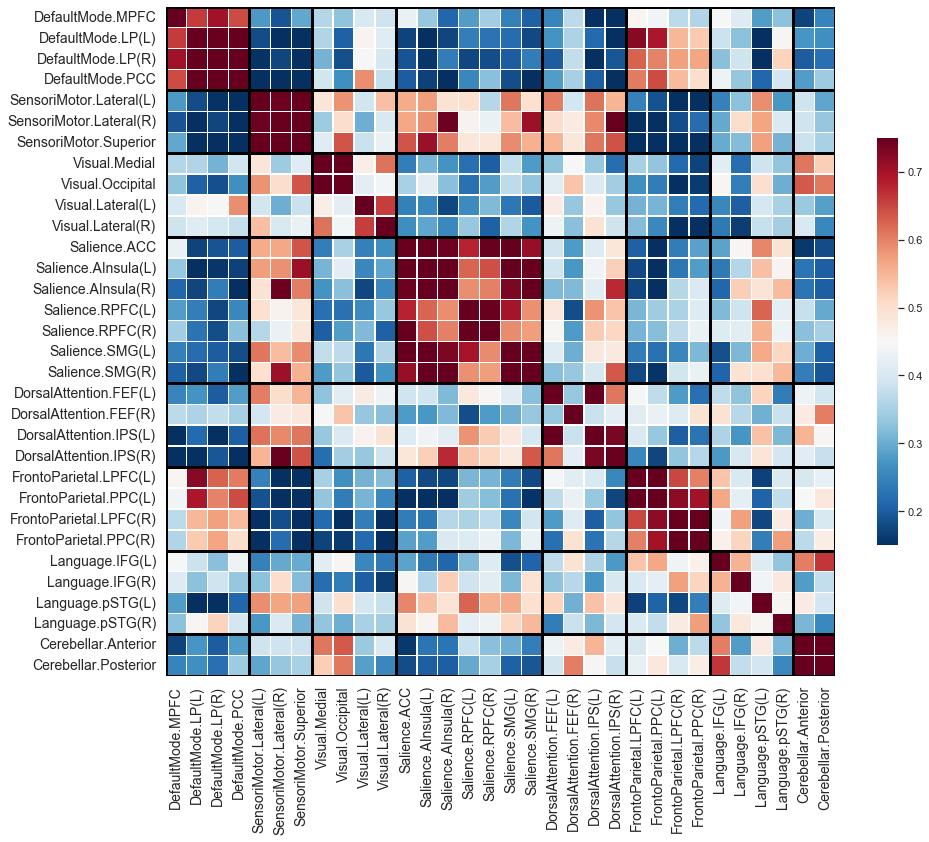

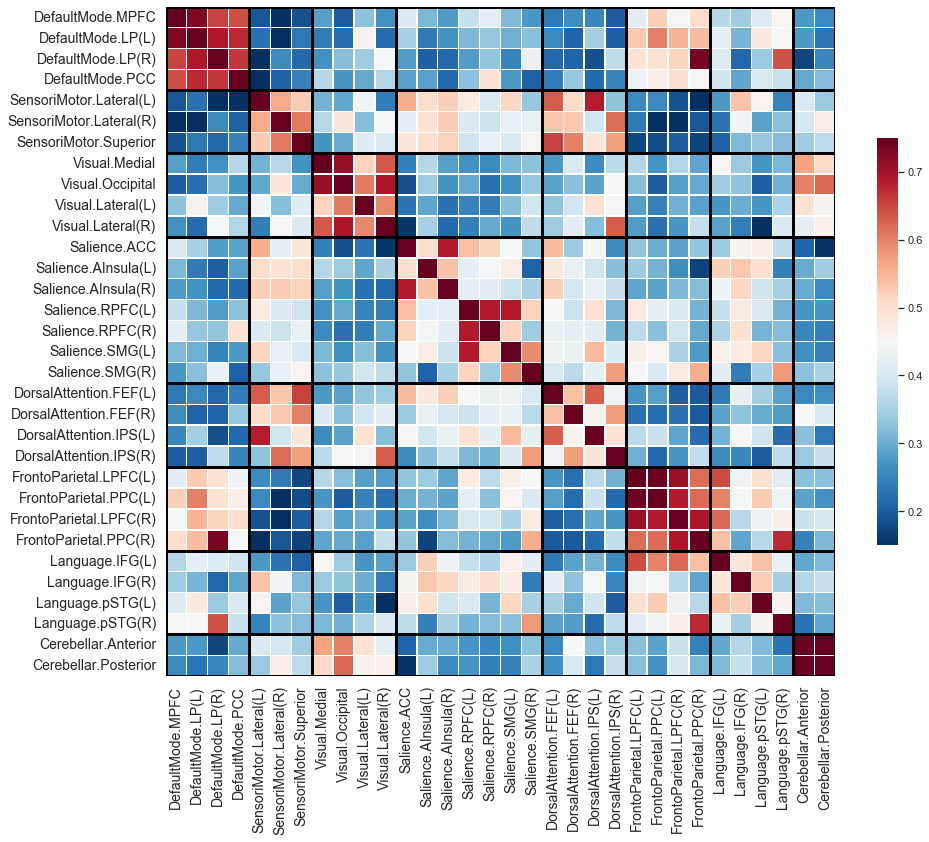

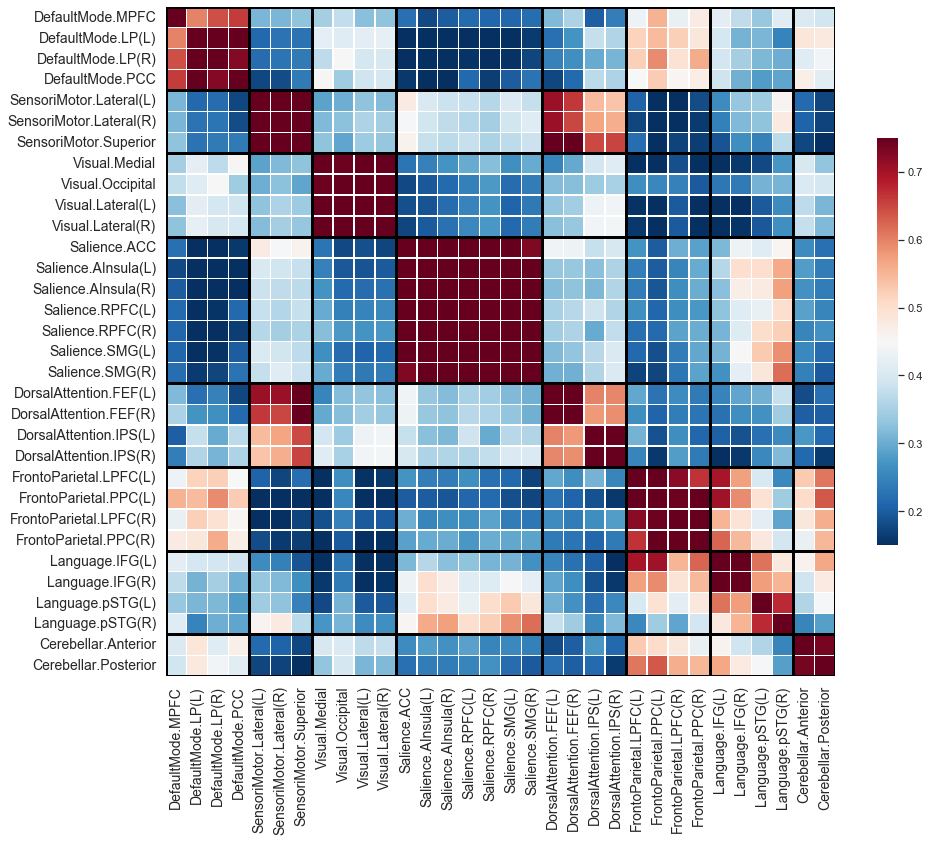

In [21]:
# group_vectors = [[1]*15+[0]*15,[0]*15+[1]*15]

group_vector = ['Mild','Severe', 'Control']
# norm_mean_allegiance_clean = norm_mean_allegiance[dual_vector]
group_labels = np.array(["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15)

net_filter = [True for i in range(32)]
fig = plt.figure(num=None, figsize=(15, 15), facecolor='white')
# --- generating matrix plots with colors for each network
for i, vec in enumerate(group_vector):
        group_filted = np.where(group_labels == vec)
#         print(i,vec)
        M = np.squeeze(allegiance_matrix[group_filted, :, :]).mean(axis = 0)
   
# #         ax = figures.matrix_networks_plot(M, 
# #                                      network_colors[net_filter], 
# #                                      dpi = 300, colorbar = True, 
# #                                      group = group_label[i], 
# #                                      suffix = None, 
# #                                      out_dir = None)



        jet = cm.get_cmap("RdBu_r") 
        f,ax = plt.subplots(figsize=(15, 15))
        heatmap = sns.heatmap(M, cmap = jet, vmax= 0.75,vmin=0.15, center=0.45,
                    square = True, linewidths=.5,cbar = True, cbar_kws={"shrink": .5},xticklabels= roi_label, yticklabels = roi_label)
        bottom, top = heatmap.get_ylim()
        heatmap.set_ylim(bottom + 0.5, top - 0.5)

        ax.tick_params(labelsize = 14 )
        ax.hlines([0,4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
        ax.vlines([0,4,7,11,18,22,26,30,32], *ax.get_xlim(), colors='black', linewidth=3)
        ## setup colorbar
#         cb = heatmap.figure.colorbar(heatmap.collections[0]) #显示colorbar
#         cb.
#         cb.set_label('Module Allegiance')
#         cb.ax.tick_params(labelsize=28)
        
        myfig = heatmap.get_figure()
        myfig.savefig(f"{save_path}_{vec}_allegiance_tr50.png",bbox_inches='tight', pad_inches=0, dpi=300)
        myfig.show()

In [19]:
parcellations = np.asarray([['network32', 'Network32', 32,8],
                            ['power', 'Power', 264,8], 
                            ['schaefer', 'Schaefer', 300,8]])

out_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'

save_path = out_dir+'\\'+parcellations[0][1]+'\\'
# norm_mean_allegiance = np.load(f'{out_dir}\\{parcellations[0][1]}\\whole-brain_network_normalized_mean_allegiance_tidy.npy')
# norm_mean_allegiance = np.load('../../dfc_modules_result/whole-brain_network_normalized_mean_allegiance_corrected.npy')

In [20]:
# save_path = out_dir+'\\'+parcellations[0][1]+'\\'+parcellations[0][0]
save_path

'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\Network32\\'

In [23]:
norm_mean_allegiance = np.load(f'{out_dir}\\{parcellation}\\whole-brain_network_normalized_mean_allegiance_50.npy')
print(norm_mean_allegiance.shape)

(30, 8, 8)


0 Mild
(array([ 0,  1,  6,  9, 12, 14], dtype=int64),)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


1 Severe
(array([ 2,  3,  4,  5,  7,  8, 10, 11, 13], dtype=int64),)
2 Control
(array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype=int64),)


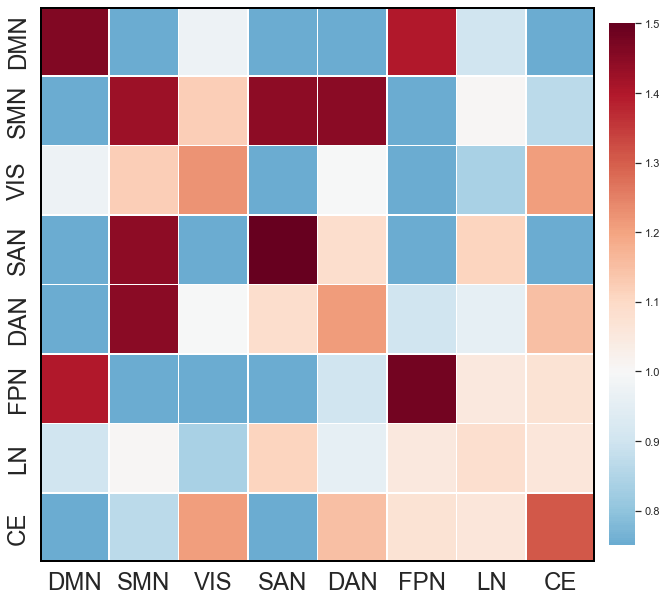

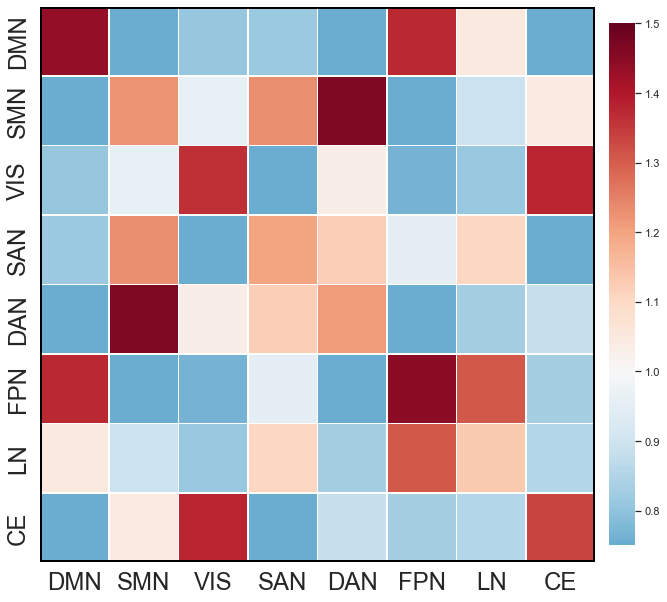

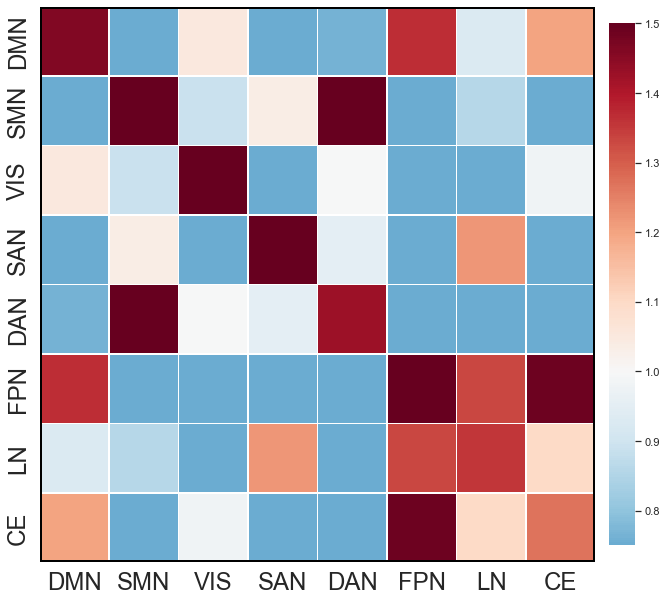

In [25]:
group_idx = [1]*15 +[0]*15
group_vector = ['Mild','Severe', 'Control']
# norm_mean_allegiance_clean = norm_mean_allegiance[dual_vector]
group_labels = np.array(["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15)
net_names = ['DMN','SMN','VIS',"SAN",
          "DAN","FPN","LN","CE"]

for g, group in enumerate(group_vector):
    print(g, group)
    group_filted = np.where(group_labels == group)
    print( group_filted)
    m_na = np.squeeze(norm_mean_allegiance[group_filted,:, :]).mean(axis=0)
    
#     break
    #ax[ses].imshow(m_na)
    
#     f,ax = plt.subplots(figsize=(10, 10))
#     jet = cm.get_cmap("RdBu_r") 
# #     f,ax = plt.subplots(figsize=(15, 15))
#     heatmap = sns.heatmap(m_na,cmap = jet, vmax= 1.5,vmin=0.75, center=1.0,
#                 square = True, linewidths=.6,cbar = True, 
#                           cbar_kws= { #"pad": .03,
# #                                      'fraction':.05,
#                                      "shrink": .5
# #                                      'ticks':[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5],
# #                                     'label':"Recruitment&Integration"
#                           }
#                           ,xticklabels = network32_ubique_networks, yticklabels = network32_ubique_networks)

    jet = cm.get_cmap("RdBu_r") 
    f,ax = plt.subplots(figsize=(12, 12))
    heatmap = sns.heatmap(m_na, cmap = jet, vmax= 1.5,vmin=0.75, center= 1 ,
                square = True, linewidths=.5,cbar = True, cbar_kws={"shrink": .8,"pad":0.02},xticklabels= net_names, yticklabels = net_names)
    bottom, top = heatmap.get_ylim()
    heatmap.set_ylim(bottom + 0.5, top - 0.5)

    ax.tick_params(labelsize = 24 )
#     bottom, top = heatmap.get_ylim()
#     ax.tick_params(labelsize = 18)
# #     cbar = ax[g].collections[0].colorbar
# #     cbar.set_label('Recruitment&Integration',fontdict=font1)
    
#     heatmap.set_ylim(bottom + 0.5, top - 0.5)
    ax.hlines([0,8], *ax.get_xlim(), colors='black', linewidth=4)
    ax.vlines([0,8], *ax.get_xlim(), colors='black', linewidth=4)
      
    myfig = heatmap.get_figure()
    myfig.savefig(f"{save_path}_recru_inte_{group}_tr_50.png",bbox_inches='tight', pad_inches=0, dpi=300)
    myfig.show()

In [50]:
# m_na